# Esercitazione 6: clustering non-supervisionato con k-means e GMM, confronto con PCA e con classificazione supervisonata basata su k-NN.

**Task:** familiarizzare con l'implementazione di algoritmi di clustering usando la libreria scikit-learn

**Dataset:** World Happiness Report 2016

Il World Happiness Report è una survey di riferimento sullo stato della felicità nel mondo.

Gli happiness score e la relativa classifica utilizzano i dati del sondaggo Gallup World Poll. Il punteggio è basato sulle risposte alle domande poste nel sondaggio ad abitanti dei vari paesi analizzati.

Le colonne che seguono l'happiness score nella tabella fornita stimano
la misura in cui ciascuno dei sei fattori - *produzione economica, sostegno sociale, aspettativa di vita, libertà, assenza di corruzione e generosità* - contribuisce a rendere le valutazioni della qualità della vita più alte in ciascun paese rispetto a *Dystopia*, un paese ipotetico che ha valori pari alle medie nazionali più basse del mondo per ciascuno dei sei fattori. Non hanno alcun impatto sul punteggio totale (*happiness score*) riportato per ogni paese, ma spiegano perché alcuni paesi si collocano più in alto di altri.

In [1]:
!rm -rf 2016.csv
!wget http://giagu.web.cern.ch/giagu/CERN/2016.csv

--2025-03-04 14:10:09--  http://giagu.web.cern.ch/giagu/CERN/2016.csv
Resolving giagu.web.cern.ch (giagu.web.cern.ch)... 188.185.18.46, 137.138.124.182, 188.185.5.88, ...
Connecting to giagu.web.cern.ch (giagu.web.cern.ch)|188.185.18.46|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://giagu.web.cern.ch/giagu/CERN/2016.csv [following]
--2025-03-04 14:10:09--  https://giagu.web.cern.ch/giagu/CERN/2016.csv
Connecting to giagu.web.cern.ch (giagu.web.cern.ch)|188.185.18.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17132 (17K) [text/csv]
Saving to: ‘2016.csv’

2016.csv            100%[===================>]  16.73K  --.-KB/s    in 0.1s    

2025-03-04 14:10:10 (155 KB/s) - ‘2016.csv’ saved [17132/17132]



**Parte 1**

Loading, analisi e pre-processamento del dataset:

1.   leggere con pandas il dataset
2.   analisi statistica descrittiva del dataset
3.   utilizzando come features:
```
['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
```
implementare un'analisi PCA a 2 componenti del campione, graficando in due dimensioni gli elementi del dataset opportunamente colorati in base al valore del *Happiness Score* categorizzato (con un certo livello di arbitrarietà) come:
```
felice: HS = 0:     ['Happiness Score']>=6.5$
neutro: HS = 1: 6.5>['Happiness Score']>4.5$
triste  HS = 2:     ['Happiness Score']<=4.5$
```


In [2]:
import pandas as pd
df = pd.read_csv('2016.csv')
col = df.columns
features = ['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']

display(df.head())
display(df.loc[ df['Country'] == 'Italy' ])
display(df.info())

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
49,Italy,Western Europe,50,5.977,5.898,6.056,1.35495,1.04167,0.85102,0.18827,0.02556,0.16684,2.34918


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

None

Text(0.5, 1.0, 'Happiness Score & Generosity per Country')

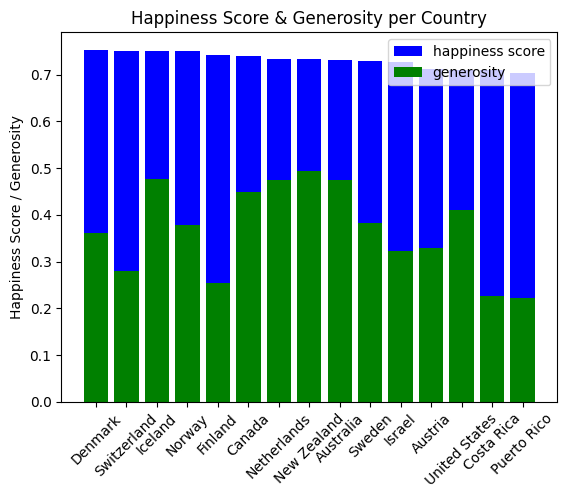

In [3]:
import matplotlib.pyplot as plt
plt.bar(df.Country.iloc[:15], df['Happiness Score'].iloc[:15]/10, color='b', label='happiness score')
plt.bar(df.Country.iloc[:15], df['Generosity'].iloc[:15], color='g', label='generosity')
plt.xticks(rotation=45)
plt.legend()
plt.ylabel('Happiness Score / Generosity')
plt.title('Happiness Score & Generosity per Country')

In [4]:
print("Paese più generoso:")
display( df.loc[ df['Generosity'] == df['Generosity'].max() ].Country )

print()
print("Paese più benestante:")
display( df.loc[ df['Economy (GDP per Capita)'] == df['Economy (GDP per Capita)'].max() ].Country )


Paese più generoso:


,Country
118,Myanmar



Paese più benestante:


,Country
35,Qatar


In [5]:
# analisi descrittiva del dataset[features]
display(df[features].describe())
display(df[features].corr())

# Devo normalizzare il dataset
df_mean = df[features].mean()
df_std = df[features].std()
df_norm = (df[features]-df_mean)/df_std
print('\nDopo normalizzazione')
print('\nMedia osservabili:')
print(df_norm.mean())
print('\nStd osservabili:')
print(df_norm.std())

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Economy (GDP per Capita),1.000000,0.669540,0.837067,0.362283,0.294185,-0.025531,0.068624
Family,0.669540,1.000000,0.588377,0.450208,0.213561,0.089629,0.119672
Health (Life Expectancy),0.837067,0.588377,1.000000,0.341199,0.249583,0.075987,0.100857
Freedom,0.362283,0.450208,0.341199,1.000000,0.502054,0.361751,0.091631
Trust (Government Corruption),0.294185,0.213561,0.249583,0.502054,1.000000,0.305930,-0.002909
Generosity,-0.025531,0.089629,0.075987,0.361751,0.305930,1.000000,-0.133001
Dystopia Residual,0.068624,0.119672,0.100857,0.091631,-0.002909,-0.133001,1.000000



Dopo normalizzazione

Media osservabili:
Economy (GDP per Capita)         0.000000e+00
Family                          -2.715450e-16
Health (Life Expectancy)         2.262875e-16
Freedom                         -2.715450e-16
Trust (Government Corruption)    2.262875e-16
Generosity                       5.657187e-18
Dystopia Residual               -4.073175e-16
dtype: float64

Std osservabili:
Economy (GDP per Capita)         1.0
Family                           1.0
Health (Life Expectancy)         1.0
Freedom                          1.0
Trust (Government Corruption)    1.0
Generosity                       1.0
Dystopia Residual                1.0
dtype: float64


Componente 1 	 Varianza spiegata: 0.4174969414017797
Componente 2 	 Varianza spiegata: 0.20266625323528772
Varianza spiegata totale: 0.6201631946370674


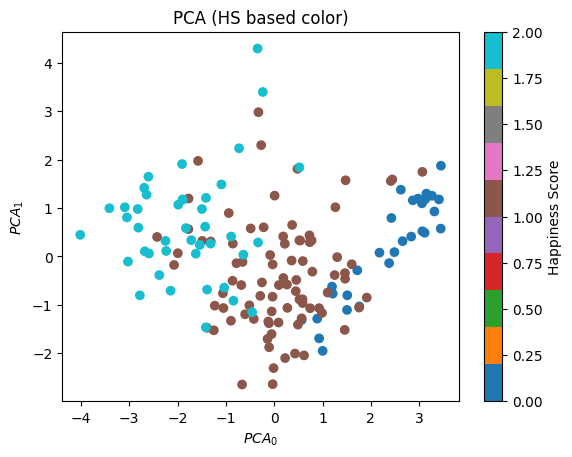

In [6]:
import numpy as np
import matplotlib.pyplot as plt

happy_sele = (df['Happiness Score'] >= 6.5)
neutral_sele = (df['Happiness Score'] > 4.5) & (df['Happiness Score'] < 6.5)
sad_sele = (df['Happiness Score'] <= 4.5)

# faccio un nuovo array Happiness Score (HS)
HS = np.zeros(shape=df['Happiness Score'].shape)
HS[happy_sele] = 0
HS[neutral_sele] = 1
HS[sad_sele] = 2

# analisi PCA a due componenti
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_norm)
explained_variance = pca.explained_variance_ratio_
for i,var in enumerate(explained_variance):
  print(f'Componente {i+1} \t Varianza spiegata: {var}')
print(f'Varianza spiegata totale: {np.sum(explained_variance)}')
# Grafico le prime due componenti colorando a seconda del HS
plt.scatter(pca_result[:,0], pca_result[:,1], c=HS, cmap='tab10')
plt.xlabel(r'$PCA_0$')
plt.ylabel(r'$PCA_1$')
plt.title('PCA (HS based color)')
plt.colorbar(label='Happiness Score')
plt.show()

In [7]:
display(df_norm.head())

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.182515,1.387743,1.035194,1.432347,2.763977,0.890243,0.762759
1,1.389861,1.318378,1.331642,1.474681,2.471284,0.285559,0.680210
2,1.145869,1.460932,1.350391,1.341835,0.109208,1.750543,0.932395
3,1.511312,1.249613,1.038465,1.546980,1.982532,1.019135,0.624919
4,1.095747,1.278634,1.104390,1.374823,2.453362,0.091847,0.922418


**Parte 2**

**Clustering k-means**

1.   implementare un clustering k-means con $k=[2,10]$ e trovare i valori di k più compatibili con il campione con il metodo dell'elbow
2.   provare ad usare il metodo *Silhouette*:
```
La silouette S misura quanto è simile un punto ai punti del suo cluster (coesione A), confrontato con quanto è dissimile ai punti degli altri cluster (separazione B):
S = (B-A)/max(A,B)
S raggiunge un massimo globale per il k ottimale ...
usare: sklearn.metrics.silhouette_score
```
quale dei due metodi funziona meglio?

3.   colorare i punti nello spazio 2D PCA con i risultati del clustering k-means ottenuti con il k ottimale e confrontare qualitativamente con le label dei tre gruppi basati sull'HappinessScore
4.   addestrare infine un k-means con k=3 clusters e calcolare l'accuracy tra cluster predetto e gruppo basato sull'HappinesScore

> NOTA IMPORTANTE: l'indice di gruppo di un algoritmo di clustering in generale non corrisponde all'indice di classe (non è un algoritmo di classificazione e l'indice di cluster è solo un contatore interno di associazione di ogni evento del campione ad uno dei cluster ricostruiti dall'algoritmo).
Per calcolare una pseudo-accuracy bisogna quindi o mappare gli indici tra loro (facile se ci sono pochi cluster) o usare un algoritmo diverso tipo [adjusted_rand_score](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) di scikit-learn.

**Clustering GMM**

5.   implementare un clustering GMM con 3 componenti, usando l'implementazione di scikit-learn: *from sklearn.mixture import GaussianMixture*
6.   colorare i punti nello spazio 2D PCA con i risultati del clustering GMM e confrontare con le label dei tre gruppi basati sull'HappinessScore, e plottare le regioni con il 68% di probabilità di appartenere a ciascuna componente gaussiana (suggerimento: produrre una grid sullo spazio PCA-0, PCA-1, applicare la trasformazione inversa PCA ai punti di tale grid, e poi applicare la predizione della probabilità della GMM *predict_proba* ai diversi punti)


Max variation for k = 3


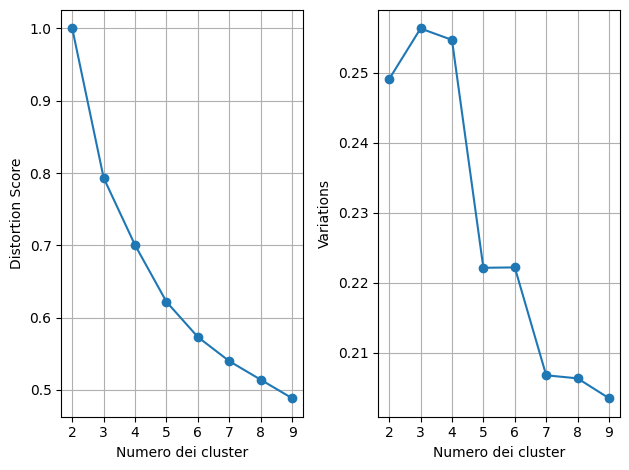

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# metodo dell'elbow
k_max = 10
distortions = []
variations = []
for i in range(2, k_max):
  km = KMeans(
      n_clusters=i, init='k-means++',
      n_init = 50, max_iter=600,
      tol=1e-04, random_state=0
  )
  km.fit(df_norm.values)
  labels = km.labels_
  distortions.append(km.inertia_)
  variations.append(silhouette_score(df_norm.values, labels, metric = 'euclidean'))

distortions=np.array(distortions)
variations = np.array(variations)

plt.subplot(1,2,1)
plt.plot(range(2,k_max), distortions/distortions[0], marker='o')
plt.xlabel('Numero dei cluster')
plt.xticks(np.arange(2,k_max))
plt.ylabel('Distortion Score')
plt.grid()
plt.subplot(1,2,2)
plt.plot(range(2,k_max), variations, marker='o')
plt.xlabel('Numero dei cluster')
plt.xticks(np.arange(2,k_max))
plt.ylabel('Variations')
plt.grid()

plt.tight_layout()

index = np.where(variations==variations.max())[0][0]
k = range(2, k_max)
k_best = k[index]
print(f'Max variation for k = {k_best}')


# spiegazione di kMeans
# init='k-means++': Specifica il metodo di inizializzazione dei centroidi, che è 'k-means++'. Questo metodo è una tecnica per selezionare i centroidi iniziali in modo intelligente per migliorare la convergenza dell'algoritmo K-Means.
# n_init=20: Specifica il numero di volte che l'algoritmo K-Means viene eseguito con diverse inizializzazioni casuali dei centroidi. L'algoritmo restituirà i risultati della migliore esecuzione.
# max_iter=600: Specifica il numero massimo di iterazioni che l'algoritmo K-Means può eseguire per ogni esecuzione. Se l'algoritmo non converge entro questo numero di iterazioni, si fermerà.
# tol=1e-04: Specifica la tolleranza, che è il criterio di convergenza per l'algoritmo K-Means. Se la somma dei quadrati delle distanze tra i centroidi in due iterazioni consecutive è inferiore a questa tolleranza, l'algoritmo si considera convergente.
# distortions.append(km.inertia_): Calcola e memorizza la distorsione (l'inertia) dei cluster trovati nell'iterazione corrente.
# L'inertia è una misura della somma delle distanze quadrate tra i punti dati e i centroidi dei cluster più vicini.
# Solitamente, si cerca l'elbow nel grafico delle distorsioni rispetto al numero di cluster, che indica il punto in cui l'aggiunta di ulteriori cluster non porta a una significativa riduzione della distorsione.
# silhouette_score(): è una misura della coesione interna e della separazione tra i cluster. Un punteggio silhouette più alto indica che i campioni sono stati assegnati ai cluster in modo più appropriato.
# km.labels_ : restituirà un array che contiene l'etichetta del cluster a cui ciascuna osservazione è stata assegnata.

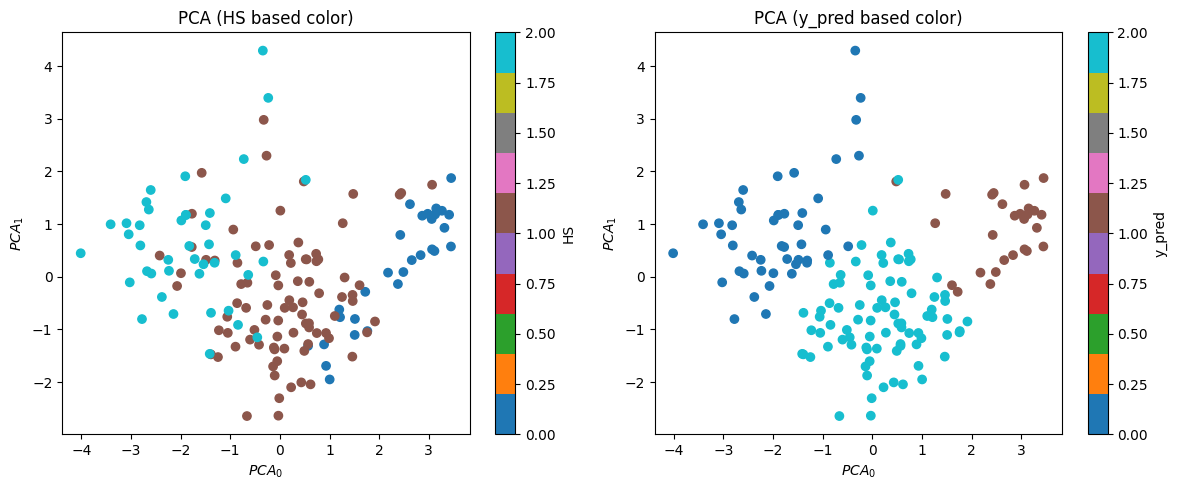

In [21]:
# Faccio k-Means con il valore k_best
km = KMeans(
    n_clusters=k_best, init='k-means++',
    n_init=50, max_iter=600,
    tol=1e-04, random_state=0
)
y_km = km.fit(df_norm.values)
y_pred = y_km.labels_.astype(int)


fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # Imposta due subplot affiancati
# Primo plot: colorazione in base a HS
sc1 = ax[0].scatter(pca_result[:, 0], pca_result[:, 1], c=HS, cmap='tab10')
ax[0].set_xlabel(r'$PCA_0$')
ax[0].set_ylabel(r'$PCA_1$')
ax[0].set_title('PCA (HS based color)')
cbar1 = plt.colorbar(sc1, ax=ax[0])
cbar1.set_label('HS')
# Secondo plot: colorazione in base a y_pred (GMM)
sc2 = ax[1].scatter(pca_result[:, 0], pca_result[:, 1], c=y_pred, cmap='tab10')
ax[1].set_xlabel(r'$PCA_0$')
ax[1].set_ylabel(r'$PCA_1$')
ax[1].set_title('PCA (y_pred based color)')
cbar2 = plt.colorbar(sc2, ax=ax[1])
cbar2.set_label('y_pred')

plt.tight_layout()  # Assicura che i grafici non si sovrappongano
plt.show()

[[-0.9917132  -0.8475633  -1.11266504 -0.33983119 -0.04998185  0.1589726
  -0.415716  ]
 [ 1.17223509  0.86998382  0.95271613  0.98240787  1.15829973  0.78618865
   0.08569461]
 [ 0.21214999  0.24222497  0.40547112 -0.19555759 -0.49707891 -0.48398109
   0.27633665]]
[0.34202816 0.20790357 0.45006828]


<ipython-input-23-8f013a179a9e>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


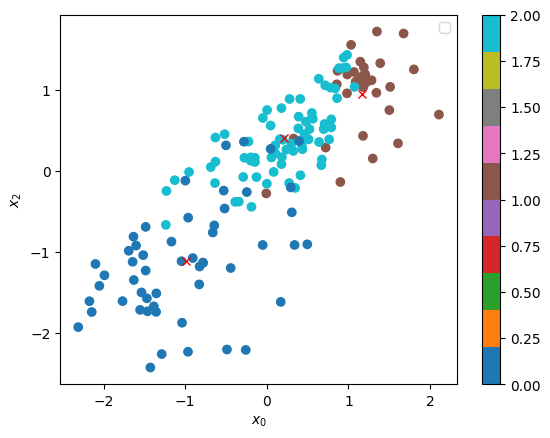

In [23]:
# Algoritmo GMM
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, max_iter=50).fit(df_norm.values)
gmm_score = gmm.score_samples(df_norm.values)
y_pred = gmm.predict(df_norm.values)
means = gmm.means_
print(means)
pi = gmm.weights_
print(pi)
cov = gmm.covariances_

plt.scatter(df_norm.iloc[:,0], df_norm.iloc[:,2], c=y_pred, cmap='tab10')
plt.plot(means[0,0], means[0,2], 'rx')
plt.plot(means[1,0], means[1,2], 'rx')
plt.plot(means[2,0], means[2,2], 'rx')
plt.xlabel('$x_0$')
plt.ylabel('$x_2$')
plt.colorbar()

**Parte 3**

Confronto con un classificatore k-NN

1.   classificare gli eventi del campione con un classificatore supervisionato k-NN usando come label i tre gruppi felice, neutro, triste (0,1,2) dell'Happiness Score (scegliere in modo opportuno il numero di primi vicini per il k-NN utilizzando una k-fold x-validation)
2.   confrontare con l'accuracy ottenuta usando come predizione della classe l'indice di cluster di k-means fatta al punto 2.4B

In [12]:
from sklearn import neighbors
from sklearn.model_selection import cross_val_score  # cross validation
from sklearn.model_selection import train_test_split

# suddivisione dataset
rnd_ini = 123456
np.random.seed(rnd_ini)
train_to_test_ratio = 0.70

X_train, X_test, y_train, y_test = train_test_split(df_norm, HS, train_size = train_to_test_ratio, shuffle=True, random_state=rnd_ini)

print(f'Splitting train/test: {X_train.shape}/{X_test.shape}')

Splitting train/test: (109, 7)/(48, 7)


In [13]:
# k-NN Classifier con diversi valori di k
from sklearn.metrics import accuracy_score

k = range(1,30)

# Trova il miglior k con Cross-Validation
k_values = range(1, 21)
mean_accuracies = []

for k in k_values:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='accuracy')  # Solo su Train!
    mean_accuracies.append(np.mean(scores))

# Seleziona il k migliore
best_k = k_values[np.argmax(mean_accuracies)]
print(f"Miglior valore di k: {best_k} con accuratezza media {max(mean_accuracies):.4f}")

# Allena il modello con k migliore
best_knn = neighbors.KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Valuta il modello sul Test Set
y_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Accuratezza su Test Set con k={best_k}: {test_accuracy:.4f}")

Miglior valore di k: 5 con accuratezza media 0.8616
Accuratezza su Test Set con k=5: 0.8750


**Per casa:**

testare i vari algoritmi di clustering in funzione dei loro parametri

indentificare quali tra le feature del World Happines report dataset forniscono il maggior contributo all'Happines Rank: i.e. cosa rende un paese più felice?

provare ad utilizzare gli altri algoritmi di clustering (agglomerativo, DBSCAN) che abbiamo discusso durante la lezione in aula

esistono versioni più recenti del db world happiness score (fino al 2023), provare a combinare più anni e/o confrontare anni pre covid con anni post-covid per capire se ci siano state variazioni significative ([ Worls Happines Report](https://worldhappiness.report)).

In [96]:
# Vedo quali features influenzano di più l'Happiness Score tramite Feature Ranking di Random Forest
from sklearn.ensemble import RandomForestRegressor

# Addestra la Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(df_norm, HS)

# Stampa l'importanza delle feature
feature_importance = pd.Series(model.feature_importances_, index=df_norm.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)

Health (Life Expectancy)         0.547688
Dystopia Residual                0.204582
Economy (GDP per Capita)         0.075176
Freedom                          0.070741
Family                           0.044773
Trust (Government Corruption)    0.042900
Generosity                       0.014140
dtype: float64


**DBSCAN su un altro dataset**

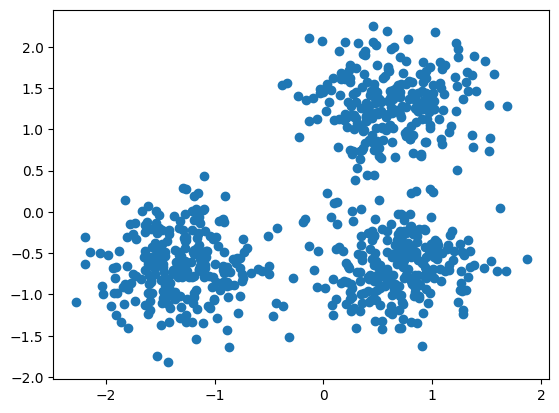

In [76]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1,1], [-1,-1], [1,-1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.40, random_state=0)
X = StandardScaler().fit_transform(X)

plt.scatter(X[:,0], X[:,1])
plt.show()

In [91]:
# Implementazione DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# eps: distanza massima per considerare un punto come vicino
# min_samples: numero minimo di punti per formare un cluster

labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# set(labels): trova i cluster unici
# (1 if -1 in labels else 0): rimuove il cluster con i punti rumorosi che hanno label -1
# list(labels).count(-1): conta quanti sono stati classificati come rumore (outliers)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise_}')
print(f'Silhouette coefficient: {metrics.silhouette_score(X, labels):.3f}')
# Silhouette score: se vicino a 1 i cluster sono ben separati, se vicino a 0 i cluster sono sovrapposti

Estimated number of clusters: 3
Estimated number of noise points: 18
Silhouette coefficient: 0.626


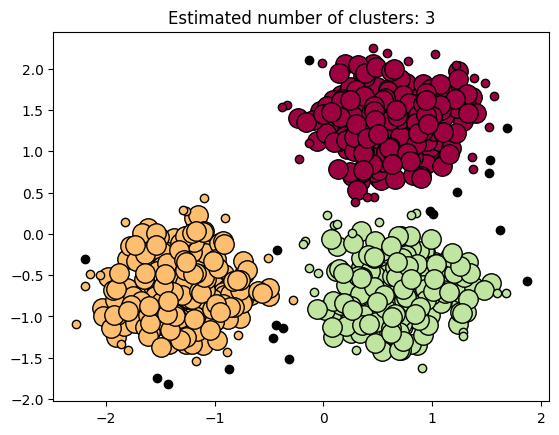

In [92]:
# Visualizzazione
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True  # segna i centroidi
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]  # colori per i clusters

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Nero per i punti rumorosi

    class_member_mask = labels == k


    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
      xy[:, 0], xy[:, 1], "o",
      markerfacecolor=tuple(col),
      markeredgecolor="k",
      markersize=14
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
      xy[:, 0], xy[:, 1], "o",
      markerfacecolor=tuple(col),
      markeredgecolor="k",
      markersize=6
  )

plt.title(f"Estimated number of clusters: {n_clusters}")
plt.show()